# Import Required Libraries

Import the necessary libraries, including pandas and os.


In [2]:
import pandas as pd
import os
import json

# Define the Directory Path

Define the path to the 'runs6_res' directory.


In [3]:
directory_path = "../runs6_res/"

# add a specific folder name to the path
specific_folder_name = "elements"
directory_path = os.path.join(directory_path, specific_folder_name)

# Read Files and Extract Data

Use os to list all files in the directory, then open each file and extract the data.


In [4]:
listdir = os.listdir(directory_path)
listdir

['BengezzouIdrissMezianeGhilas_100_bm25_bdy_sec_p_list_ss1_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_17_bm25_bdy_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_18_bm25_article_header_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_19_bm25_article_header_sec_p_list_st_ss1_template_reflist_link_entry_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_20_bm25_article_sec_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_21_bm25_article_sec_header_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_22_bm25_article_sec_p_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_23_bm25_article_sec_p_list_header_ss1_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_24_bm25_article_sec_p_list_header_ss1_table_row_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_88_bm25_article_event_title_stop670_porter_k1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_89_bm25_article_event_sec_stop670_

In [5]:
def read_result_file(file_path):
    column_names = ["Metric", "Query", "Value"]
    df = pd.read_csv(
        file_path,
        delimiter="\t+",
        header=None,
        skiprows=1,
        skip_blank_lines=True,
        skipfooter=1,
        engine="python",
        names=column_names,
    )
    return df


read_result_file(os.path.join(directory_path, listdir[0])).head(15)

,Metric,Query,Value
0,num_ret,2009011,1.500000e+03
1,num_rel,2009011,2.600000e+01
2,num_rel_ret,2009011,2.500000e+01
3,ret_size,2009011,1.542872e+07
4,rel_size,2009011,7.115400e+04
5,rel_ret_size,2009011,6.317800e+04
6,gP[1],2009011,0.000000e+00
7,gR[1],2009011,3.846154e-02
8,gP[2],2009011,0.000000e+00
9,gR[2],2009011,7.692308e-02


In [6]:
results = []

for file in listdir:
    file_path = os.path.join(directory_path, file)
    df = read_result_file(file_path)

    # Extract relevant information
    num_q = df[df["Metric"] == "num_q"]["Value"].values[0]
    num_rel = df[df["Metric"] == "num_rel"]["Value"].values[0]
    num_ret = df[df["Metric"] == "num_ret"]["Value"].values[0]
    num_rel_ret = df[df["Metric"] == "num_rel_ret"]["Value"].values[0]
    ret_size = df[df["Metric"] == "ret_size"]["Value"].values[0]
    rel_size = df[df["Metric"] == "rel_size"]["Value"].values[0]
    rel_ret_size = df[df["Metric"] == "rel_ret_size"]["Value"].values[0]
    magp = df[df["Metric"] == "MAgP"]["Value"].values[0]
    p = df[df["Metric"] == "ircl_prn.0,10"]["Value"].values[0]

    if "bm25" in file:
        k1 = file.split("_")[6][1:]
        b = file.split("_")[7][1:].split("i")[0][:-1]

    # Initialize a dictionary for each file
    file_data = {
        "num_q": num_q,
        "num_rel": num_rel,
        "num_ret": num_ret,
        "num_rel_ret": num_rel_ret,
        "ret_size": ret_size,
        "rel_size": rel_size,
        "rel_ret_size": rel_ret_size,
        "magp": magp,
        "p": p,
        "k1": k1,
        "b": b,
    }

    # Extract precision and recall values for different k values
    k_values = [1, 2, 3, 5, 10, 25, 50]
    for k in k_values:
        precision_key = f"gP[{k}]"
        recall_key = f"gR[{k}]"
        precision_value = df[(df["Metric"] == precision_key) & (df["Query"] == "all")]["Value"].values[0]
        recall_value = df[(df["Metric"] == recall_key) & (df["Query"] == "all")]["Value"].values[0]

        # Add precision and recall values to the file_data dictionary
        file_data[f"{precision_key}"] = precision_value
        file_data[f"{recall_key}"] = recall_value

    # Append the file_data dictionary to the results list
    results.append({file: file_data})

In [7]:
results

[{'BengezzouIdrissMezianeGhilas_100_bm25_bdy_sec_p_list_ss1_stop670_porter_k1_b0.5.i.txt': {'num_q': 7.0,
   'num_rel': 26.0,
   'num_ret': 1500.0,
   'num_rel_ret': 25.0,
   'ret_size': 15428719.0,
   'rel_size': 71154.0,
   'rel_ret_size': 63178.0,
   'magp': 0.1104547130540549,
   'p': 0.3085955777860972,
   'k1': 'ist',
   'b': 's',
   'gP[1]': 0.3558683734580684,
   'gR[1]': 0.0286537691999876,
   'gP[2]': 0.3101424229372704,
   'gR[2]': 0.0525979622618277,
   'gP[3]': 0.3086391029179424,
   'gR[3]': 0.064637393418906,
   'gP[5]': 0.2926976411100872,
   'gR[5]': 0.1269423153876935,
   'gP[10]': 0.1950746234688086,
   'gR[10]': 0.2114607381414104,
   'gP[25]': 0.1081360022758425,
   'gR[25]': 0.3216917536245267,
   'gP[50]': 0.0921940518019226,
   'gR[50]': 0.38081694216148}},
 {'BengezzouIdrissMezianeGhilas_17_bm25_bdy_stop670_porter_k1_b0.5.i.txt': {'num_q': 7.0,
   'num_rel': 26.0,
   'num_ret': 1500.0,
   'num_rel_ret': 25.0,
   'ret_size': 17029714.0,
   'rel_size': 71154.0,
 

In [8]:
import matplotlib.pyplot as plt

def plot_recall_precision_curve(filename, results):
    # Find the data for the specified filename
    file_data = next((data for data in results if filename in data), None)

    if file_data is not None:
        # Extract the inner dictionary containing metrics and values
        inner_data = file_data[filename]

        # Initialize lists to store precision and recall values for different k values
        k_values = [1, 2, 3, 5, 10, 25, 50]
        precision_values = []
        recall_values = []

        # Extract precision and recall values for each k value
        for k in k_values:
            precision_key = f"gP[{k}]"
            recall_key = f"gR[{k}]"
            precision_value = inner_data.get(precision_key, 0)  # Default to 0 if key not present
            recall_value = inner_data.get(recall_key, 0)  # Default to 0 if key not present

            # Append precision and recall values to the lists
            precision_values.append(precision_value)
            recall_values.append(recall_value)

        # Plot recall-precision curve for the specified file
        plt.figure(figsize=(10, 6))
        plt.plot(recall_values, precision_values, marker="o")

        # Set labels and title
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Recall-Precision Curve for {filename}")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Data not found for file: {filename}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


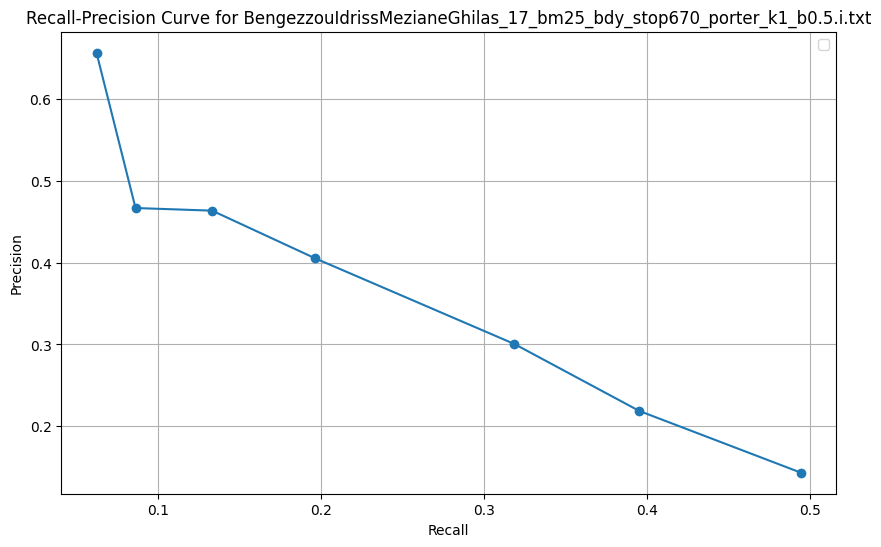

In [9]:
plot_recall_precision_curve("BengezzouIdrissMezianeGhilas_17_bm25_bdy_stop670_porter_k1_b0.5.i.txt", results)

In [10]:
# search the top 5 mapgp score 
sorted_results = sorted(results, key=lambda x: x[list(x.keys())[0]]["magp"], reverse=True)

In [27]:
best_score = sorted_results[1:6]

for i in best_score:
    print(f"Run Id: {list(i.keys())[0].split('_')[1]}") 
    print(f"Granularity: {list(i.keys())[0].split('_')[3:]}")
    print(f"MAPGP score: {i[list(i.keys())[0]]['magp']}")
    print(f"P[0, 1] score: {i[list(i.keys())[0]]['p']}")
    print()

Run Id: 92
Granularity: ['bdy', 'header', 'stop670', 'porter', 'k1', 'b0.5.i.txt']
MAPGP score: 0.1684905976425353
P[0, 1] score: 0.3730998300133489

Run Id: 88
Granularity: ['article', 'event', 'title', 'stop670', 'porter', 'k1', 'b0.5.i.txt']
MAPGP score: 0.1666832620318981
P[0, 1] score: 0.3299273617994934

Run Id: 18
Granularity: ['article', 'header', 'stop670', 'porter', 'k1', 'b0.5.i.txt']
MAPGP score: 0.1620931229169613
P[0, 1] score: 0.3710661416360809

Run Id: 20
Granularity: ['article', 'sec', 'stop670', 'porter', 'k1', 'b0.5.i.txt']
MAPGP score: 0.149876002217056
P[0, 1] score: 0.3816958706930781

Run Id: 93
Granularity: ['bdy', 'header', 'sec', 'stop670', 'porter', 'k1', 'b0.5.i.txt']
MAPGP score: 0.1454346739679662
P[0, 1] score: 0.3708312129712973

